# **Heart_Diseases_Prediction** :

Description : Here we have to predict wheather the person have disease or not.

In [1]:
# mounting (Connecting) the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection

In [5]:
# reading the csv file with the help of pandas
df = pd.read_csv('/content/drive/MyDrive/machinelearning/Heart_Diseases_Prediction/heart_disease_data.csv')

In [4]:
# printing top 5 data of the df
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Columns name** :


age -> age

sex -> sex

cp -> chest pain

trestbps -> resting Blood Pressure

chol -> serum cholestrol in mg/dl

fbs -> fasting blood sugar > 120 mg/dl

restecg -> resting electrocardiographic results (value 0, 1, 2)

thalacg -> maximum heart rate achieved

exang -> exercise inclued angina

oldpeak -> ST depression included by exercise relative to rest

slop -> the slop of the  peak exercise ST segment

ca -> number of major vessels (0-3) colored by flourosopy

thal -> 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
# printing the shape of the dataset
df.shape

(303, 14)

Note : Dataset is very small

In [7]:
# printing the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# printing the description of the data (statistical measure)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Here, we don't have any missing values

# Note

1 -> Person have Heart Diseases

2 -> Preson Do not have Heart Diseases

In [11]:
# checking how many person have heart diseases and don't have heart diseases

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Here, we can see that 165 people have heard diseases & 138 people don't have heart diseases

# Spliting the data into independent and dependent variable

In [13]:
X = df.drop(columns = 'target', axis = 1)
y = df['target']

In [14]:
X.shape

(303, 13)

In [15]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Spliting the data into Train and Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# Model Creation

Logistic Regression -> Binary CLassification

In [18]:
model = LogisticRegression()
print(model)

LogisticRegression()


In [19]:
# Fitting the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [20]:
# train model accuracy

train_pred = model.predict(X_train)
train_acc = accuracy_score(train_pred, y_train)
print('Training Model Accuracy is : ', train_acc)

Training Model Accuracy is :  0.8388429752066116


In [21]:
# test model accuracy

test_pred = model.predict(X_test)
test_acc = accuracy_score(test_pred, y_test)
print('Testing Model Accuracy is : ', test_acc)

Testing Model Accuracy is :  0.8032786885245902


# Model Prediction

67,1,0,160,286,0,0,108,1,1.5,1,3,2

67,0,0,106,223,0,1,142,0,0.3,2,2,2

In [28]:
input_data = (67,1,0,160,286,0,0,108,1,1.5,1,3,2)

# changing the input_data into numpy array
inp_arr = np.asarray(input_data)

# reshaping the inp_arr as we are predicting for only one instance
inp_reshape = inp_arr.reshape(1, -1)

prediction = model.predict(inp_reshape)
print("Prediction of the Heart Diseases is : ", prediction)

if (prediction == [0]):
  print('Person do not have Heart Diseases...')
else :
  print('Person have Hart Diseases...')

Prediction of the Heart Diseases is :  [0]
Person do not have Heart Diseases...


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
input_data = (67,0,0,106,223,0,1,142,0,0.3,2,2,2)

# changing the input_data into numpy array
inp_arr = np.asarray(input_data)

# reshaping the inp_arr as we are predicting for only one instance
inp_reshape = inp_arr.reshape(1, -1)

prediction = model.predict(inp_reshape)
print("Prediction of the Heart Diseases is : ", prediction)

if (prediction == [0]):
  print('Person do not have Heart Diseases...')
else :
  print('Person have Hart Diseases...')

Prediction of the Heart Diseases is :  [1]
Person have Hart Diseases...


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Saving the Model

In [30]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

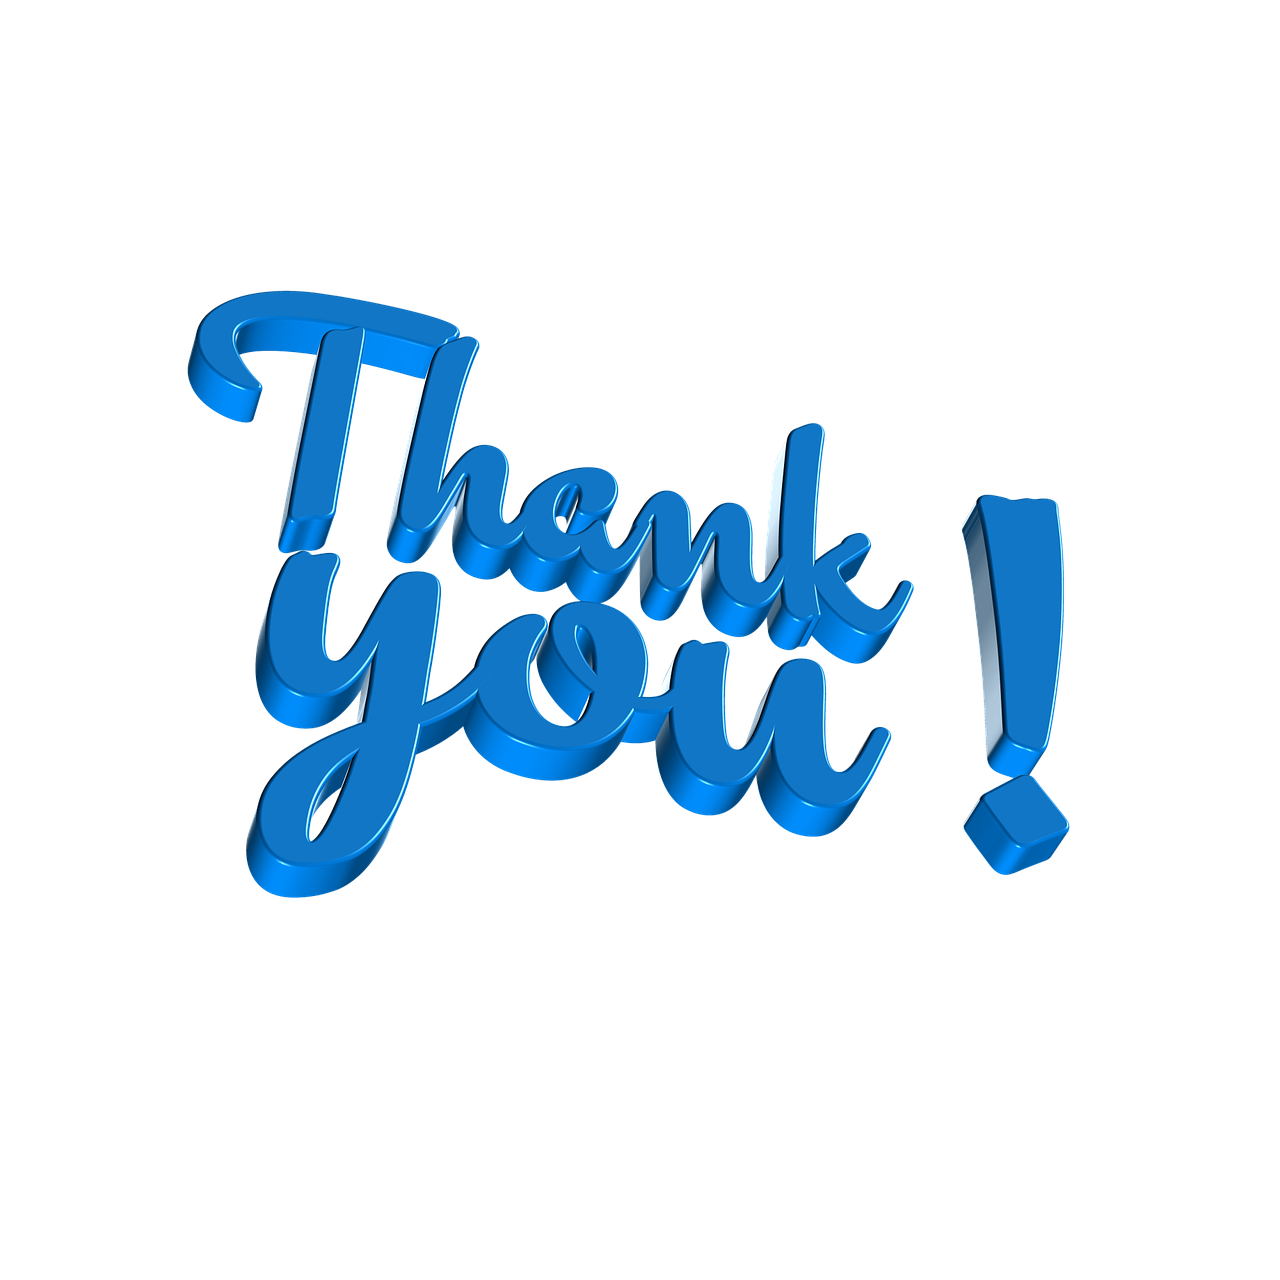